# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Reading and understanding data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


printing dataset info for more detials

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Here we can observe that, non of the row is blank

## Cleaning data
We don't need the Feature 'instant'as it is just serial number of the dataset.

In [4]:
df = df.drop(['instant','dteday'],axis =1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Drawing Pairplot

C:\Users\bitzc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


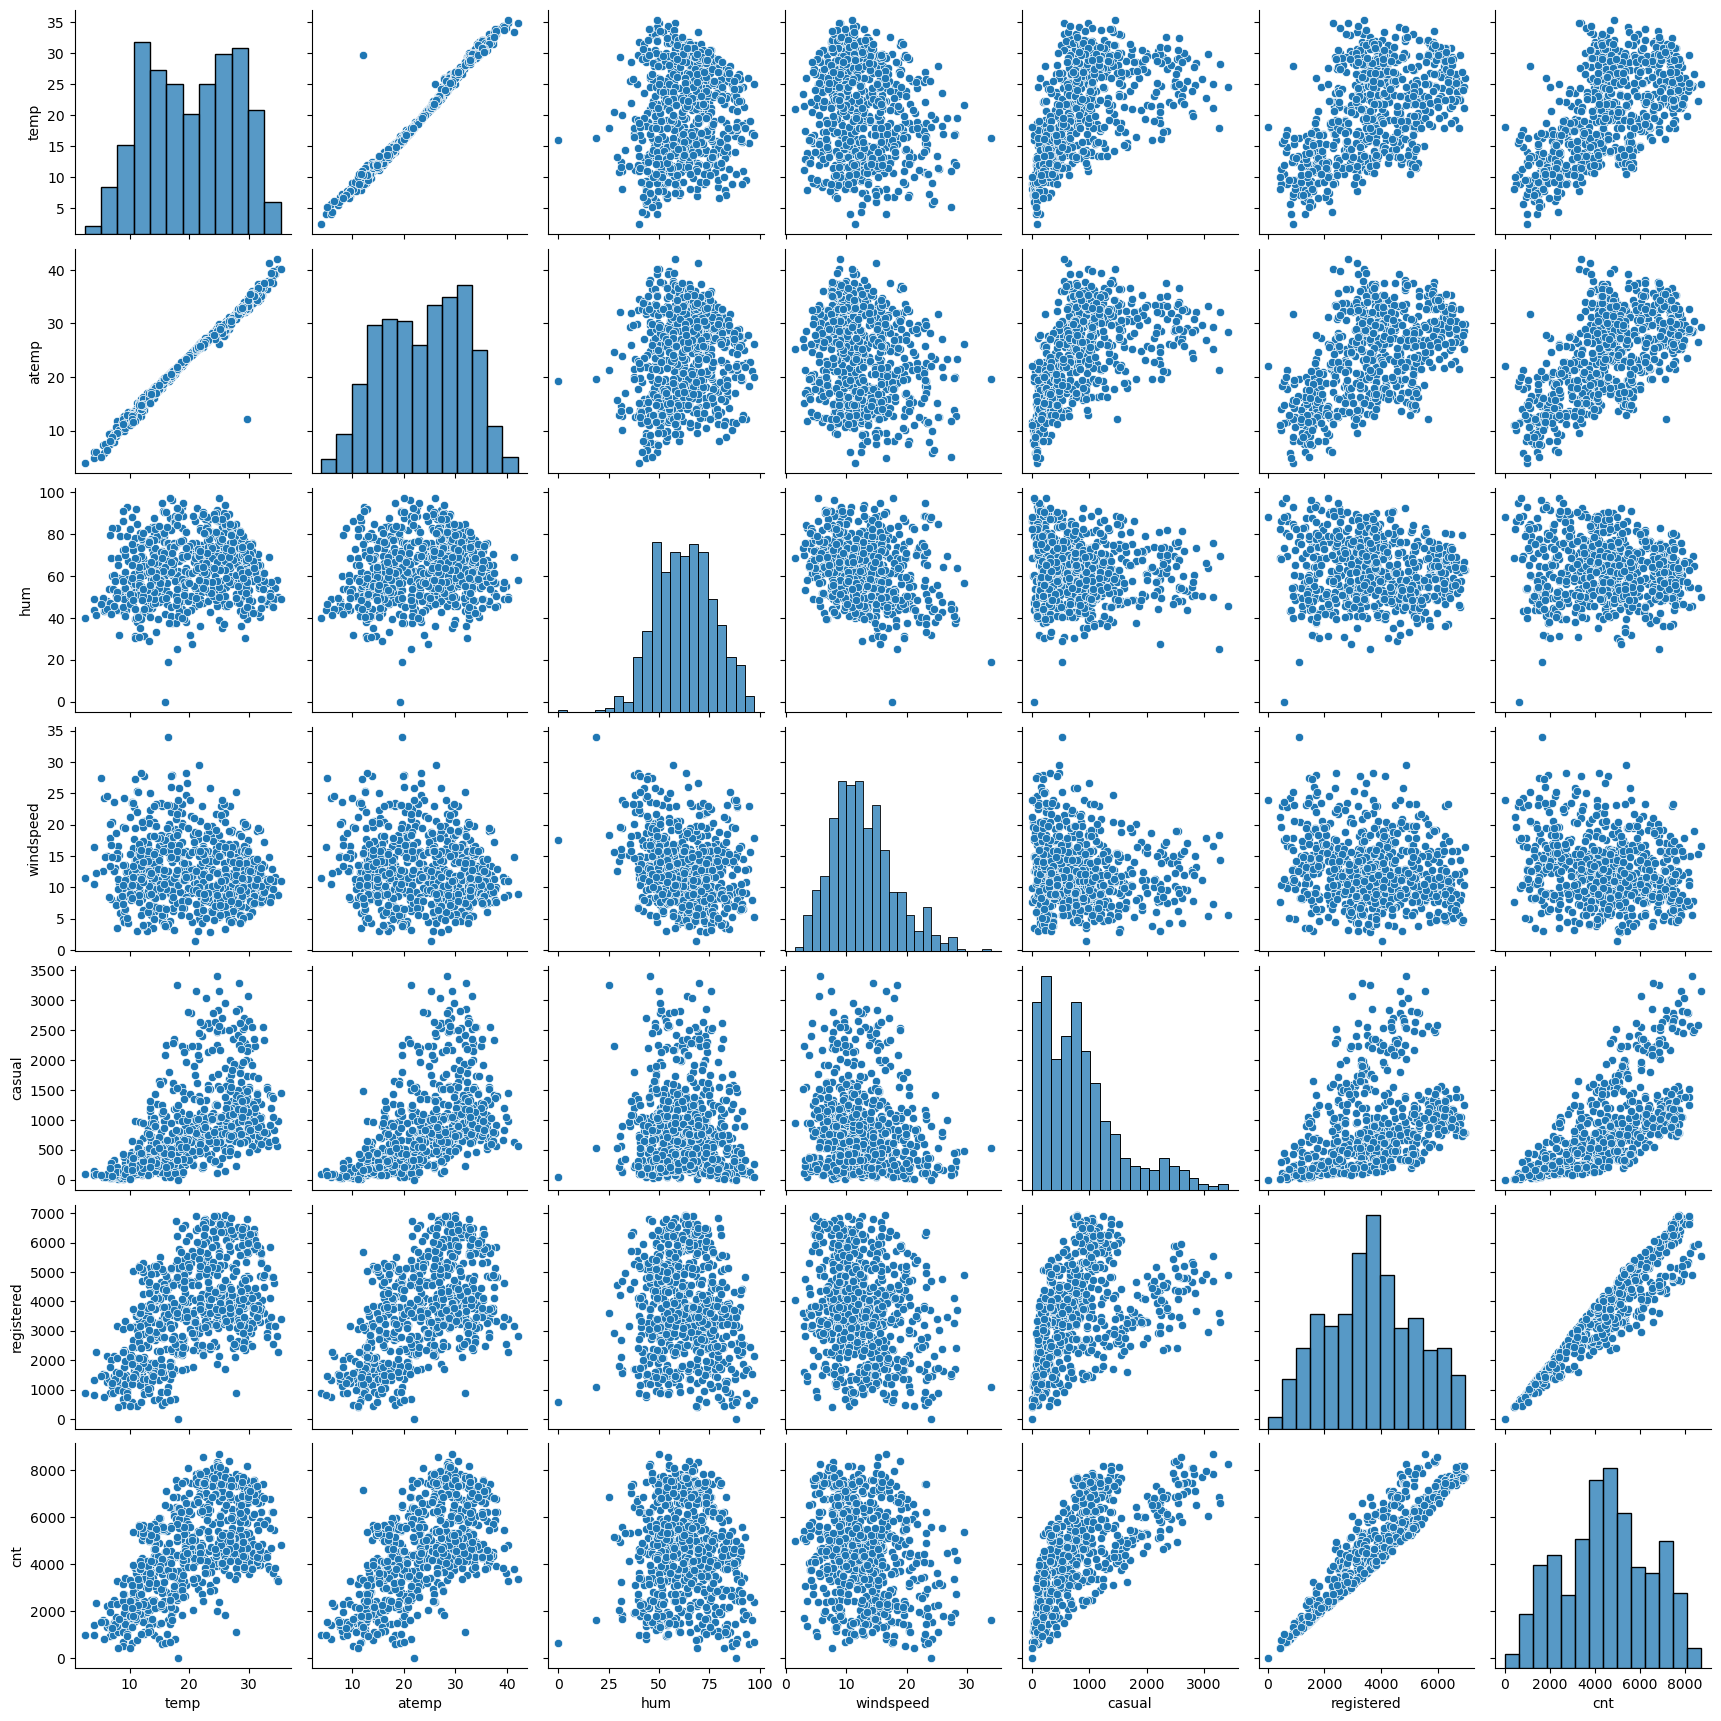

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.pairplot(df, vars=["temp", "atemp",'hum','windspeed','casual','registered','cnt'])
plt.show()

## Data correlation
Viewing correlation between variables

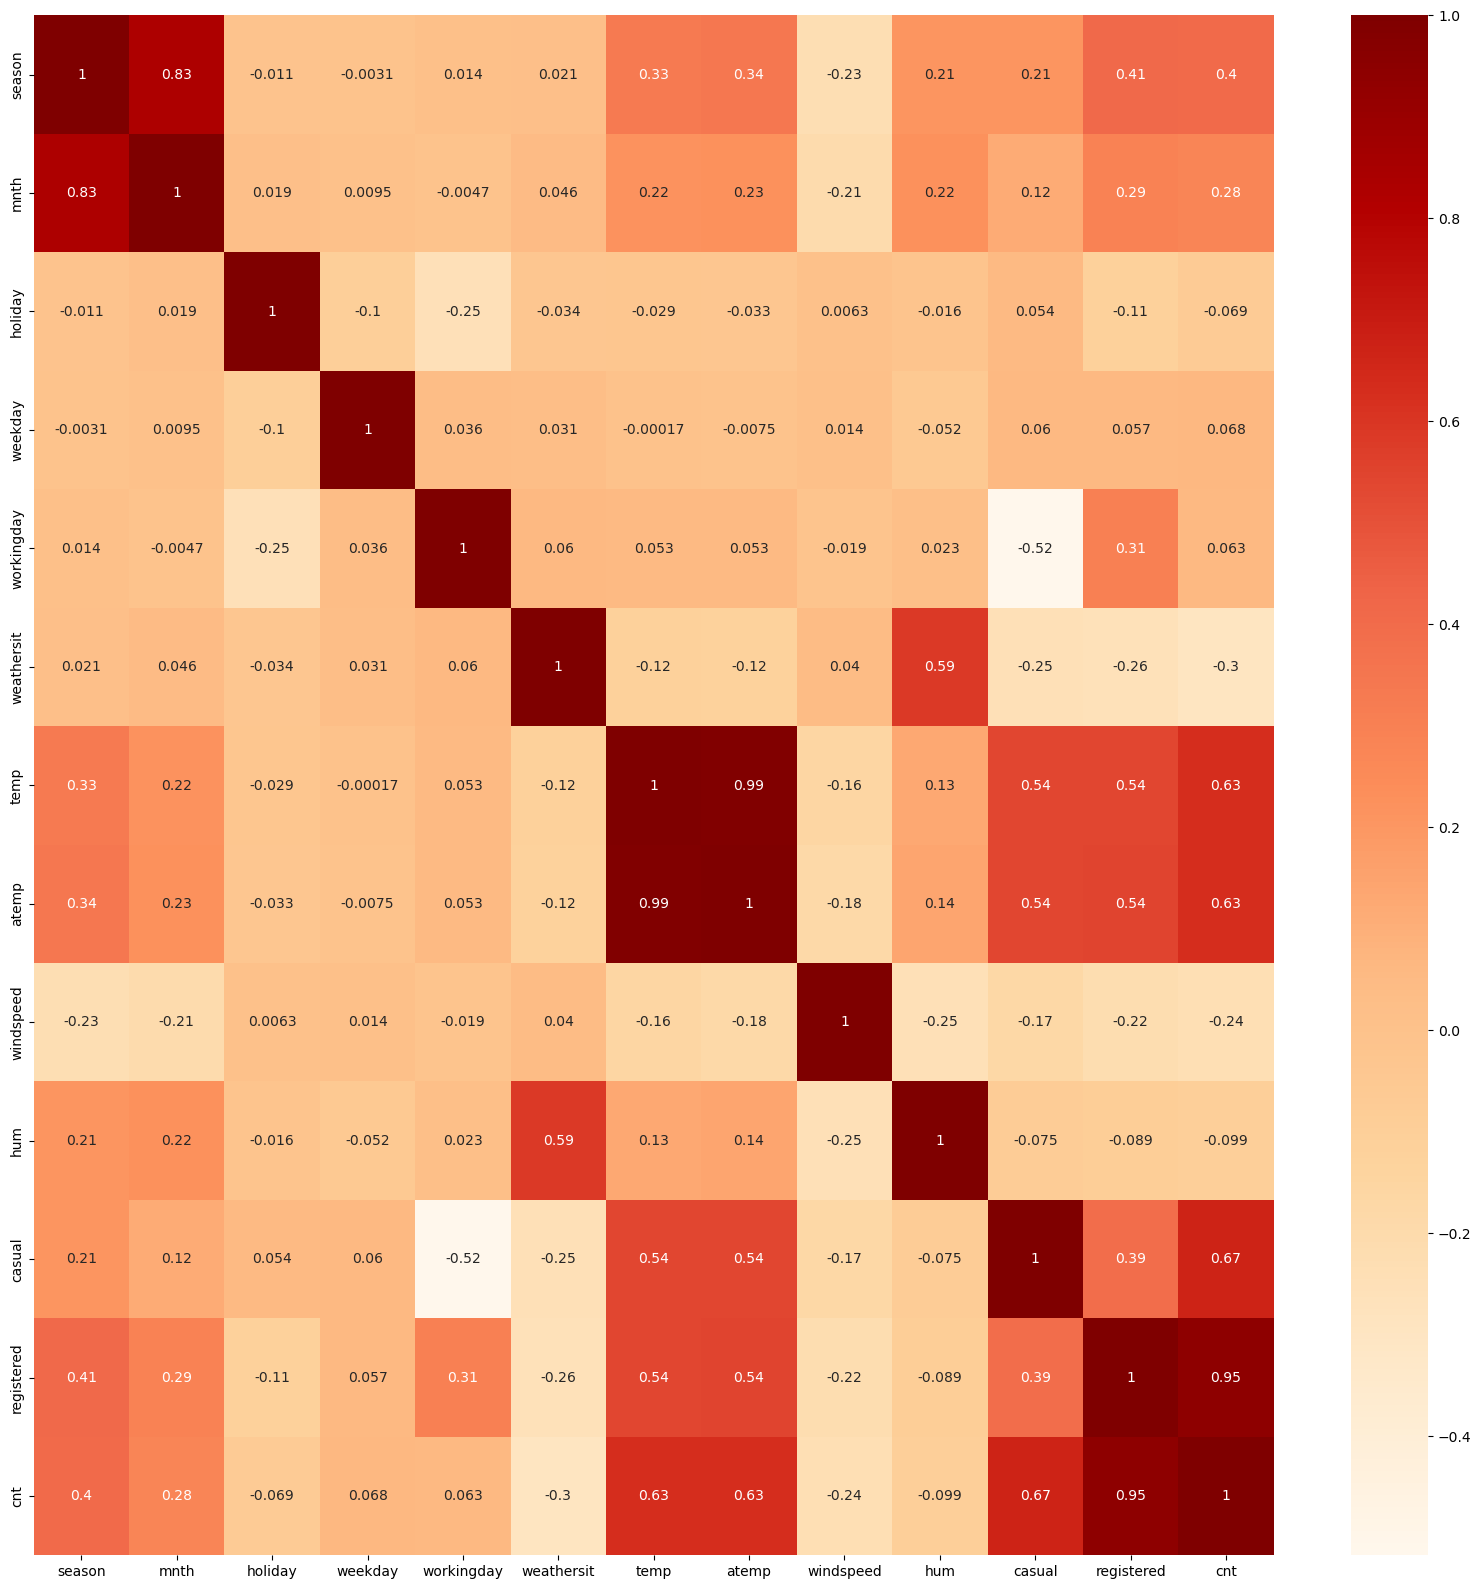

In [6]:
plt.figure(figsize = (20,20))
sns.heatmap(df[['season','mnth','holiday','weekday','workingday','weathersit','temp','atemp', 'windspeed','hum','casual','registered','cnt']].corr(),cmap='OrRd',annot =True)
plt.show()

As we can see, there are several variables correlated to cnt such as registered, casual, temp, atemp we can thereby conduct a linear regresssion model

## Cleaning more variables

In [7]:
df = df.drop(['atemp','casual','registered'],axis =1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


## Data Preparation
changing related number valules to string values

In [8]:
df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,Clear,9.305237,43.6957,12.522300,1600


## Visualising Categorical variables
Visualising variable WRT count

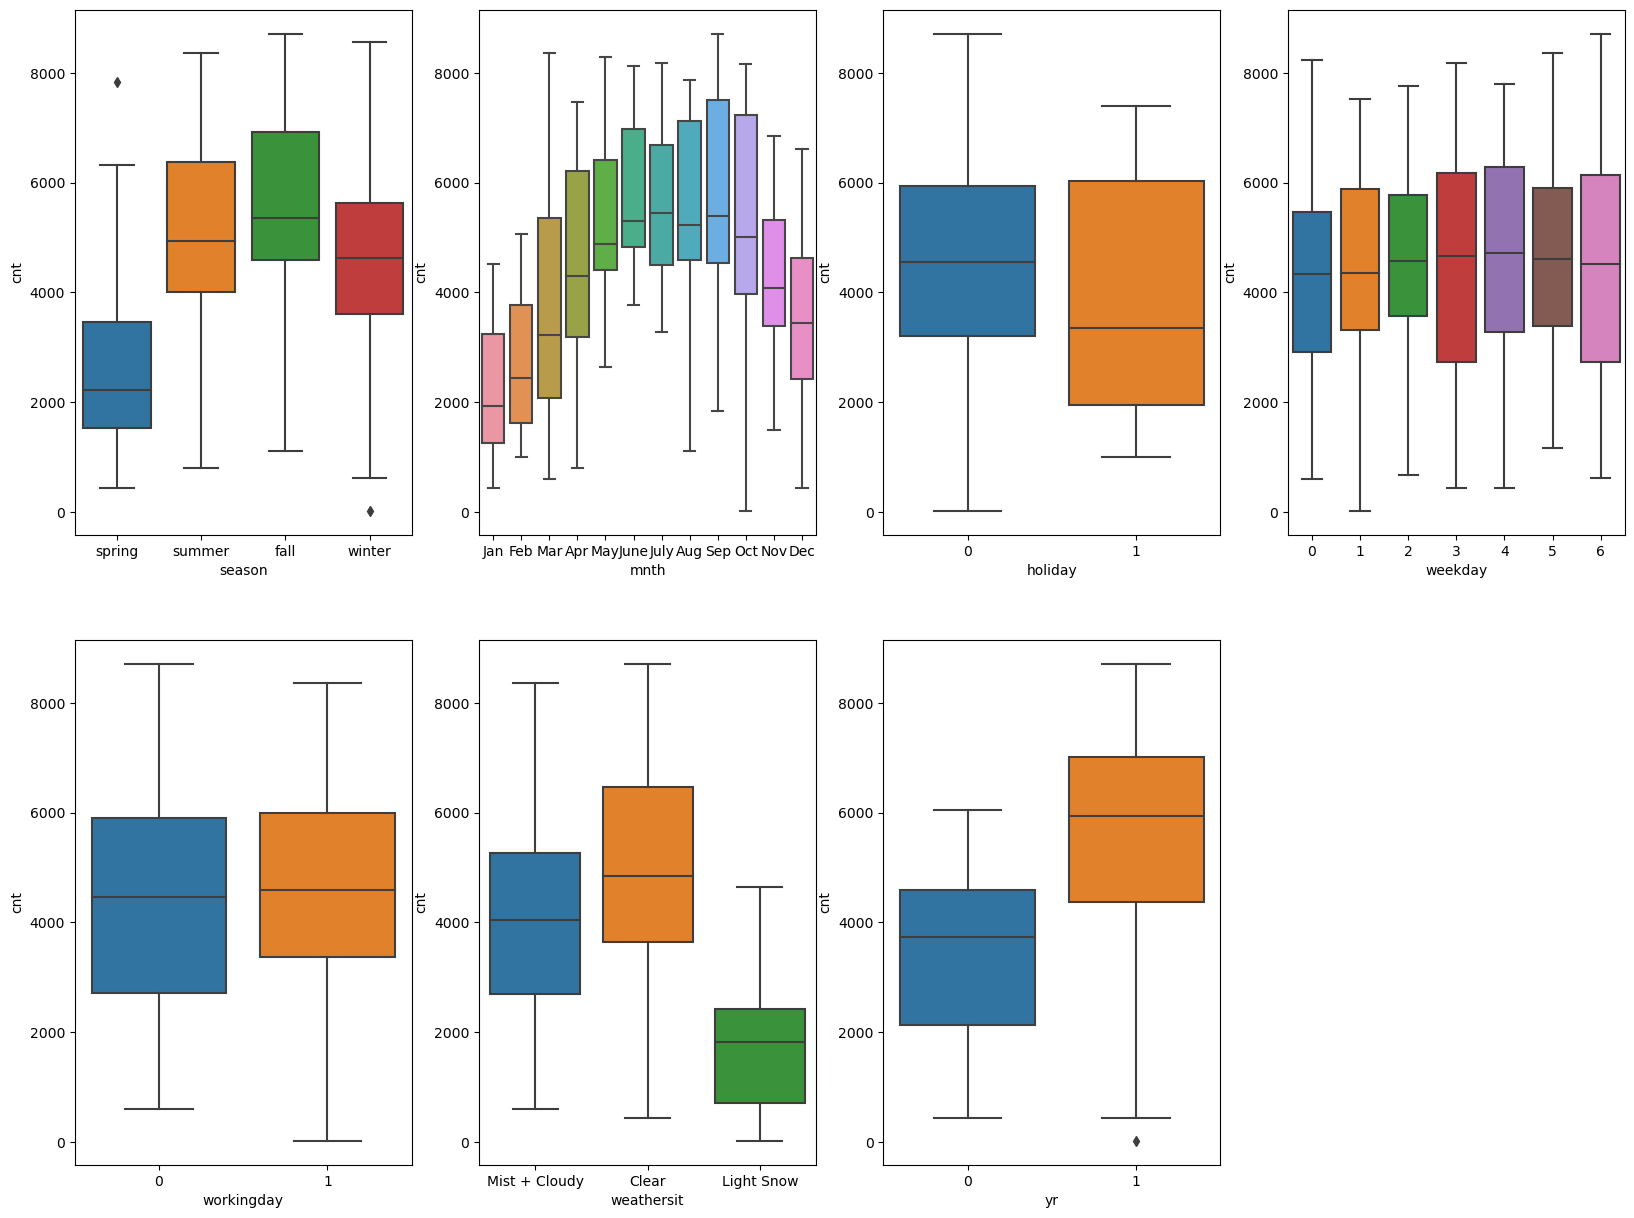

In [9]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

<b>Observations : </b><br>
* The year 2019 had a higher count of users as compared to the 2018.
* Fall season has highest rental in comparision with others.
* Highest rental goes between June & Sept.
* Rental count is higher in clear weather.

## Create dummy variables
creating dummy variables of 'season','mnth','weekday','weathersit' variables and dropping the same as these varibles will be used to create model and dont require string variables.

In [10]:
#converting weekdays int value to string, as these will be populated to header
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
#creating dummy variables for model builing
df = pd.concat([df,pd.get_dummies(df.season, drop_first=True).astype(int), pd.get_dummies(df.mnth, drop_first=True).astype(int), pd.get_dummies(df.weekday, drop_first=True).astype(int), pd.get_dummies(df.weathersit, drop_first=True).astype(int)], axis=1)
#dropping irrelevent variables.
df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Model Building
* Split data into train and test sets


In [11]:
from sklearn.model_selection import train_test_split
#split train and test set.
train_df,test_df = train_test_split(df,train_size=0.7,random_state=100)
print(train_df.shape)
print(test_df.shape)

(510, 29)
(220, 29)


* Scaling huge variables (i.e. temp, windspeed, humidity, count) using minmax scaler

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['temp', 'windspeed',"hum",'cnt']
train_df[num_vars]=scaler.fit_transform(train_df[num_vars])
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537440,0.225858,0.0,0.339853,0.542596,0.735215,1.0
hum,510.0,0.650480,0.145846,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320883,0.169803,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513499,0.224421,0.0,0.356420,0.518638,0.684710,1.0
spring,510.0,0.243137,0.429398,0.0,0.000000,0.000000,0.000000,1.0
summer,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0
winter,510.0,0.247059,0.431725,0.0,0.000000,0.000000,0.000000,1.0


* Preparing trainig dataset (X & Y sets)

In [13]:
y_train = train_df.pop('cnt')
X_train = train_df
X_train.shape

(510, 28)

* Feature selecting using RFE

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 10),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('Mon', False, 12),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 13),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

* Printing selected features

In [15]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'July', 'Sep', 'Sat', 'Sun', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

* Printing rejected features

In [16]:
X_train.columns[~(rfe.support_)]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

* create x train from RFE selected variables

In [17]:
import statsmodels.api as sm

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          2.11e-191
Time:                        21:45:42   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200      0.000       0.145       0.254
yr                0.2298      0.008     28.647      0.000       0.214       0.246
holiday          -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday        0.0837      0.010      8.665      0.000       0.065       0.103
temp              0.5277      0.033     15.884      0.000       0.462       0.593
hum              -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
spring           -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer            0.0537      0.015      3.631      0.000       0.025       0.083
winter            0.0992      0.017      5.815      0.000       0.066       0.133
July             -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep               0.0820      0.017      4.966      0.000       0.050       0.114
Sat               0.0937      0.012      8.040      0.000       0.071       0.117
Sun               0.0406      0.012      3.315      0.001       0.017       0.065
Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.47e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* as p value for holiday is high(> 0.05) & insignificant in presence of other variables therefore can be dropped

In [18]:
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          2.11e-191
Time:                        21:45:42   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1811      0.042      4.301      0.000       0.098       0.264
yr                0.2298      0.008     28.647      0.000       0.214       0.246
workingday        0.1021      0.025      4.024      0.000       0.052       0.152
temp              0.5277      0.033     15.884      0.000       0.462       0.593
hum              -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
spring           -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer            0.0537      0.015      3.631      0.000       0.025       0.083
winter            0.0992      0.017      5.815      0.000       0.066       0.133
July             -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep               0.0820      0.017      4.966      0.000       0.050       0.114
Sat               0.1121      0.027      4.181      0.000       0.059       0.165
Sun               0.0591      0.027      2.192      0.029       0.006       0.112
Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* calculating VIF

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,114.08
2,workingday,9.07
11,Sat,6.06
12,Sun,5.74
6,spring,5.02
3,temp,3.62
8,winter,3.49
7,summer,2.62
4,hum,1.91
14,Mist + Cloudy,1.57


* plotting histogram of the error terms 

Text(0.5, 0, 'Errors')

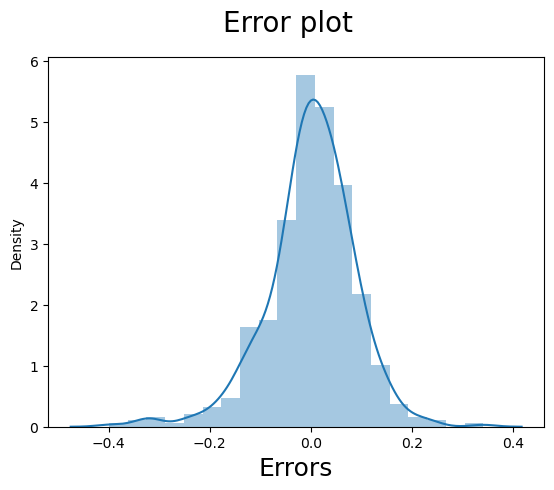

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

y_train_pr = lm.predict(X_train_rfe)
fig = plt.figure()
sns.distplot((y_train - y_train_pr), bins = 20)
fig.suptitle('Error plot', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)                        

as we can see error distribution is around 0, therefore we can move forward to make prediction.

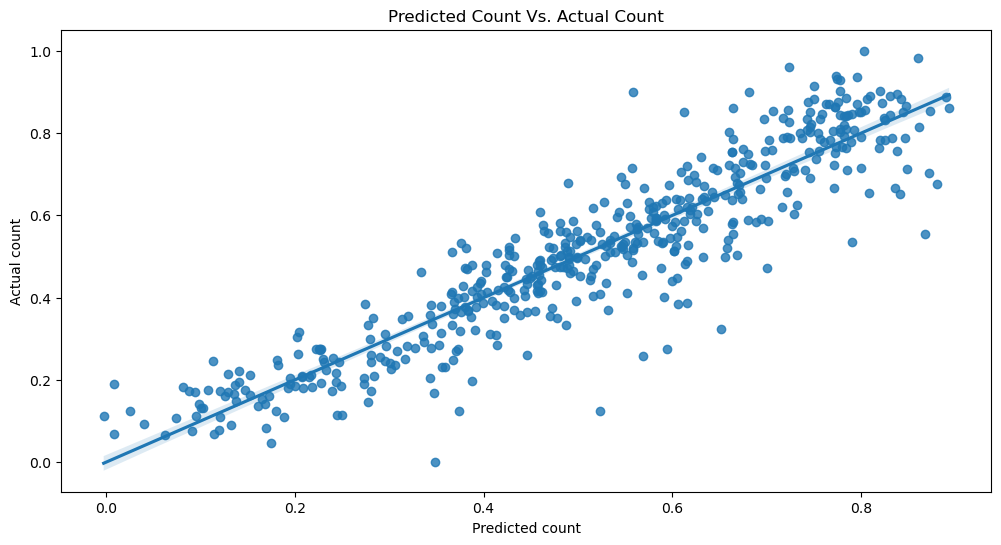

In [21]:
plt.figure(figsize = (12,6))
sns.regplot(y=y_train, x=y_train_pr)
plt.title('Predicted Count Vs. Actual Count')
plt.xlabel('Predicted count')
plt.ylabel('Actual count')
plt.show()

## Model test


In [22]:
#scaling test set
num_vars = ['temp', 'windspeed',"hum",'cnt']
test_df[num_vars]=scaler.transform(test_df[num_vars])
y_test = test_df.pop('cnt')
X_test = test_df
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
184,1.0,0,1,0,0.831783,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.511964,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.881625,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.817246,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


* considering only those columns on which model is trained.

In [23]:
X_test_sm = X_test_sm[X_train_rfe.columns]

In [24]:
X_test_sm.head()

,const,yr,workingday,temp,hum,windspeed,spring,summer,winter,July,Sep,Sat,Sun,Light Snow,Mist + Cloudy
184,1.0,0,0,0.831783,0.657364,0.084219,0,0,0,1,0,0,0,0,1
535,1.0,1,1,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,0
299,1.0,0,1,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,1
221,1.0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,0


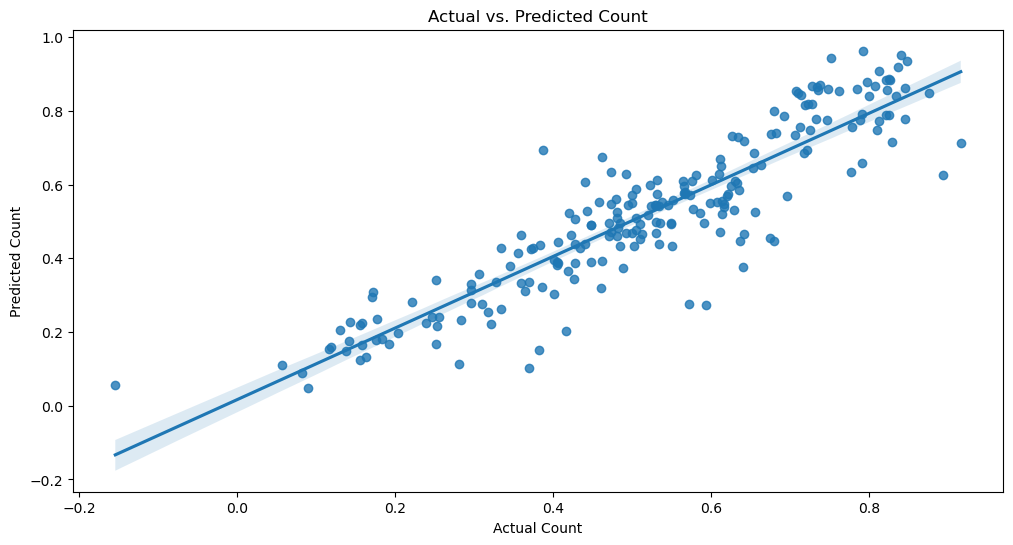

In [25]:
y_test_pr = lm.predict(X_test_sm)
plt.figure(figsize = (12,6))
sns.regplot(y=y_test, x=y_test_pr)
plt.title('Actual vs. Predicted Count')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.show()

### Above scatter plot shows the linear relationship between actual count and predicted count, therefore we can say our model is much stable

## Calculating R-squared value

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pr)

0.8175945716770195

<b>our model accuracy is apprx 81.76%</b>